<a href="https://colab.research.google.com/github/ManuelGehl/IMPRS-Introduction-to-Neural-Networks-2023/blob/main/Chapter_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 - Classification

For a classification problem, we want to build a model that can learn how different features (properties) of a system contribute **qualitatively** to that system, i.e. which features are characteristic for a certain class of objects.

The typical architecture of such an ANN is:

| Layer      | Description |
| ---------- | ----------- |
| Input      |Takes numeric coded features as input|
| Hidden     |Optional deep layers|
| Output     |Non-linear output to predict probabilities|
|Loss function|Cross entropy|


![](https://github.com/ManuelGehl/IMPRS-Introduction-to-Neural-Networks-2023/blob/main/Images/Classification%20network%20topology.jpg?raw=true)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
import seaborn as sns
sns.set(style="ticks")

# Binary classification

In the first section, we will build a model that can predict whether a cell belongs to mycobacteria or corynebacteria based on the measured cell size and cell density.

We will cover the following basic concepts:
- How can we transfer our ANN constructed for a regression problem to a binary classification problem?
- How can we use the validation holdout method to monitor how our model performs on unseen data?


**First, we create a toy data set representing populations of 2 different bacteria (500 cells each)**

The cell size of each cell is plotted against the cell density.
Labels:
- 0 - Mycobacterium
- 1 - Corynebacterium

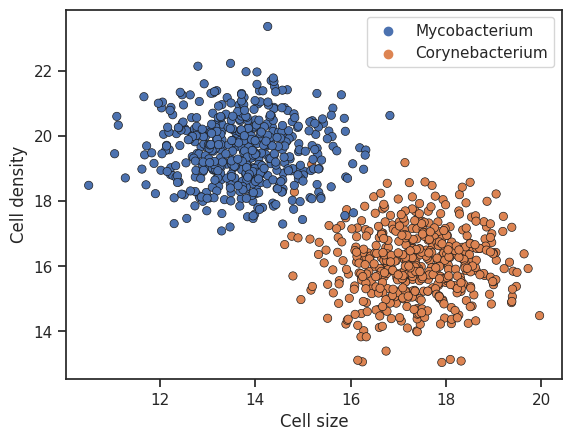

In [2]:
# Create toy data set
from sklearn.datasets import make_blobs

# Create clusters
X_total, y_total = make_blobs(n_samples=1000,
                  centers=2,
                  center_box=(10,20),
                  cluster_std=1,
                  random_state=42,
                  shuffle=True)

# Convert labels (0,1) to names
y_names = []
for i in y_total:
  if i == 0:
    y_names.append("Mycobacterium")
  else:
    y_names.append("Corynebacterium")

# Visualize data set
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, edgecolor="k")
plt.xlabel("Cell size")
plt.ylabel("Cell density");

---
❓**Question**: How would a human solve the classification problem? How would a machine solve it?

---

**Now we draw a function that can separate the two cell clusters**

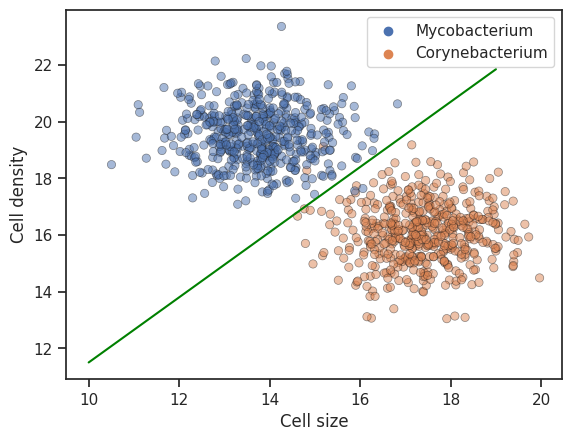

In [3]:
# Create a line to separate the clusters with slope m and intercept n
m = 1.15
n = 0
x_line = np.arange(10,20,1)
y_line = m*x_line + n

# Visualize data set
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, alpha=0.5, edgecolor="k")
plt.plot(x_line, y_line, color="green")
plt.xlabel("Cell size")
plt.ylabel("Cell density");

Now we can measure **accuracy**. This metric tells us how often the predicted label is the same as the true label.

> $Accuracy = \frac {\text {Number correct predictions}} {\text {Number total predictions}}$

In [4]:
# Define number of wrong predictions (y_pred_wrong) and number of total predictions (y_pred_total)
y_pred_wrong = 4
y_pred_total = 1000

y_pred_correct = y_pred_total - y_pred_wrong
accuracy = y_pred_correct / y_pred_total
print(f"Accuracy = {accuracy*100}%")

Accuracy = 99.6%


**Now we are going to split the data set into three parts: train (70%), test (20%), validation (10%)**

In [5]:
# Split data set into train, test and validation set
X_train, X_test, y_train, y_test = train_test_split(X_total,y_total, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.875)

# Check the split and put all values in datafram
data = [[X_train.shape, len(X_train), 100 * len(X_train) / len(X_total)],
        [y_train.shape, len(y_train), 100 * len(y_train) / len(y_total)],
        [X_test.shape, len(X_test), 100 * len(X_test) / len(X_total)],
        [y_test.shape, len(y_test), 100 * len(y_test) / len(y_total)],
        [X_val.shape, len(X_val), 100 * len(X_val) / len(X_total)],
        [y_val.shape, len(y_val), 100 * len(y_val) / len(y_total)]]
index = ["X_train", "y_train","X_test", "y_test","X_val", "y_val",]
columns = ["Shape", "Elements", "Percentage"]
pd.DataFrame(data=data,
             columns=columns,
             index=index)

Shape  Elements  Percentage
X_train  (700, 2)       700        70.0
y_train    (700,)       700        70.0
X_test   (200, 2)       200        20.0
y_test     (200,)       200        20.0
X_val    (100, 2)       100        10.0
y_val      (100,)       100        10.0

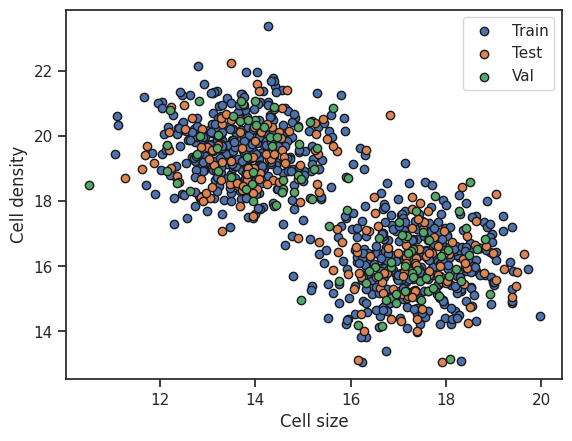

In [6]:
# Visualize data sets

plt.scatter(X_train[:,0],X_train[:,1], label="Train", edgecolor="k")
plt.scatter(X_test[:,0],X_test[:,1], label="Test", edgecolor="k")
plt.scatter(X_val[:,0],X_val[:,1], label="Val", edgecolor="k")
plt.legend()
plt.xlabel("Cell size")
plt.ylabel("Cell density");

---
Let's build our first neural network with the following components:
* **1 single dense neuron** (input and output are together)
* Sigmoid activation function **$f(x) = \frac {1}{1+e^{-x}}$**.
* Optimizer is **Stochastic Gradient Descent SGD**.
* Loss function to minimize: **Binary Crossentropy**
* Metrics to observe during training: **Accuracy**
* Validation set **(X_val, y_val)**
* Train model for **5 epochs**

In [7]:
# Set up random seed for reproducibility
tf.random.set_seed(42)

# Create model
model_1 = keras.Sequential([
    keras.Input(shape=(X_train.shape[1:])),
    layers.Dense(units=1,activation="sigmoid")])

model_1.summary()

# Compile model
model_1.compile(optimizer="sgd",
                loss=keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

# Fit model
history_1 = model_1.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
22/22 [==============================] - 2s 26ms/step - loss: 0.3452 - accuracy: 0.9443 - val_loss: 0.2337 - val_accuracy: 0.9800
Epoch 2/5
22/22 [==============================] - 0s 5ms/step - loss: 0.2069 - accuracy: 0.9929 - val_loss: 0.2053 - val_accuracy: 0.9900
Epoch 3/5
22/22 [==============================] - 0s 8ms/step - loss: 0.1824 - accuracy: 0.9914 - val_loss: 0.1830 - val_accuracy: 0.9900
Epoch 4/5
22/22 [==============================] - 0s 8ms/step - loss: 0.1615 - accuracy: 0.9943 - val_loss: 0.1789 - val_accuracy: 0.9700
Epoch 5/5
22/22 [================

Now we will check the weights our model has learned:
- $w_1$, $w_2$ for the inputs $x_i$ (cell size) and $y_i$ (cell density)
- b for the bias neuron

Remember that those parameters define the calculation **before** the activation function

In [8]:
w1, w2 = model_1.get_weights()[0]
b = model_1.get_weights()[1]
print(f"Weight 1 = {w1.item():.2f}")
print(f"Weight 2 = {w2.item():.2f}")
print(f"Bias neuron = {b.item():.2f}")

Weight 1 = 0.66
Weight 2 = -0.58
Bias neuron = 0.01


With the weights and the bias neuron we can replicate the calculation that is performed inside the neuron: $\text{output before activation} = \displaystyle (\sum_{i=0}^n x_i * w_i) + b $ <br>
$ \iff \text{output before activation} = \displaystyle (x * w_1 + y * w_2) + b $

With that we will predict the output before the activation function for every possible combination of x (cell size) and y (cell density)

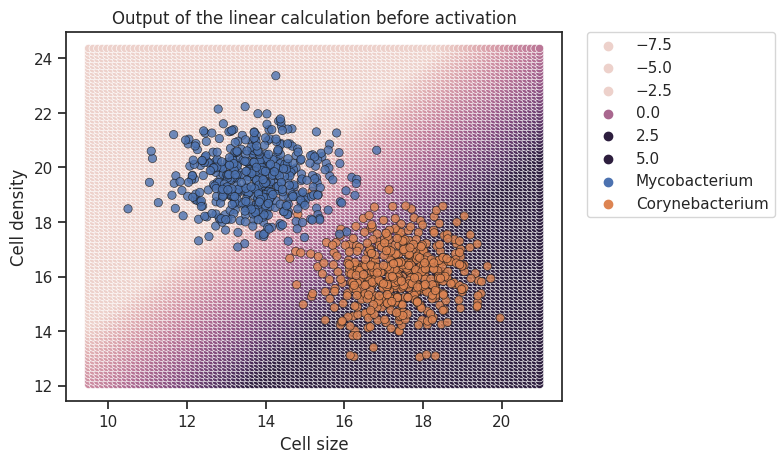

In [9]:
# Predict decision boundary

# Boundaries of plot
x_min = X_total[:, 0].min() - 1
x_max = X_total[:, 0].max() + 1
y_min = X_total[:, 1].min() - 1
y_max = X_total[:, 1].max() + 1

# Array with continous 100 points
x_array = np.linspace(x_min, x_max, 100)
y_array = np.linspace(y_min, y_max, 100)

# Combines every point from array 1 with every point of array 2
xx, yy = np.meshgrid(x_array, y_array)

# Create 2D-array with xx and yy as columns
points = np.column_stack((xx.ravel(), yy.ravel()))

# Calculates output with weights and bias neuron
mesh_output = (points[:,0]*w1 + points[:,1]*w2) + b

# Plot output before going to sigmoid function
sns.scatterplot(x=points[:,0], y=points[:,1], hue=mesh_output, hue_norm=(-2,2))
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1],hue=y_names, alpha=0.8, edgecolor="k")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Output of the linear calculation before activation")
plt.xlabel("Cell size")
plt.ylabel("Cell density");

Now we will transform the mesh grid with the different output values by passing it to the **activation function (sigmoid)**

Remember that the function looks like this:

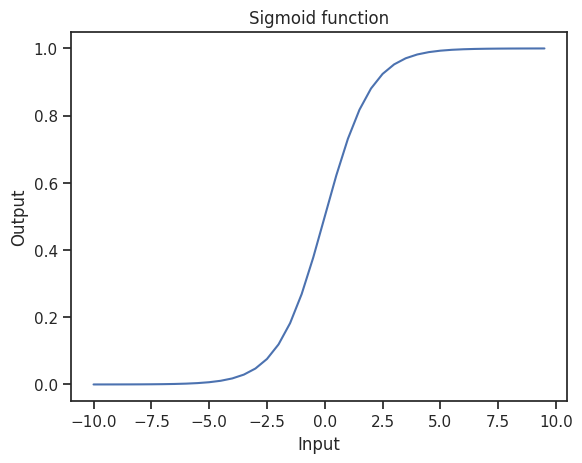

In [10]:
# Generate plot of sigmoid function
x_sigmoid = np.arange(-10,10,0.5)
y_sigmoid = tf.nn.sigmoid(x_sigmoid)
plt.plot(x_sigmoid, y_sigmoid)
plt.title("Sigmoid function")
plt.xlabel("Input")
plt.ylabel("Output");

❓**Question**: What do you expect how the activation function transforms the mesh grid values?

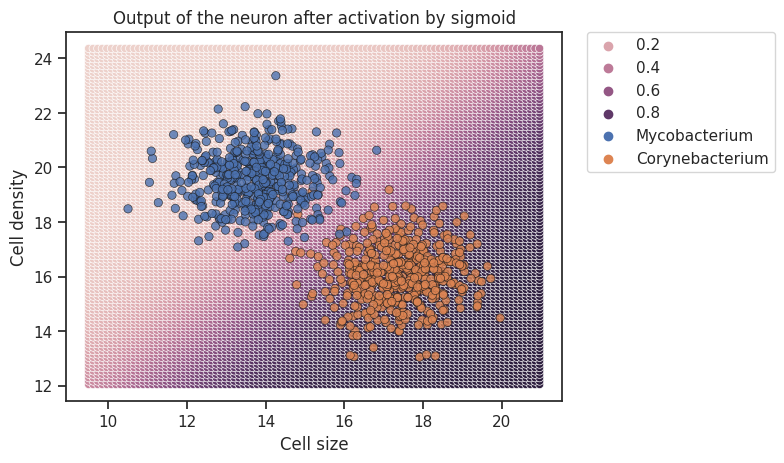

In [11]:
# Pass mesh output to sigmoid
final_output = tf.sigmoid(mesh_output)

# Plot output before going to sigmoid function
sns.scatterplot(x=points[:,0], y=points[:,1], hue=final_output)
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1],hue=y_names, alpha=0.8, edgecolor="k")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Output of the neuron after activation by sigmoid")
plt.xlabel("Cell size")
plt.ylabel("Cell density");

❓**Question**: Now that you have seen how the model comes to its conclusions, is this the same method that we have used right at the beginning to separat the two clusters?

Let's compare the actual output of our model to the deconstructed model's output

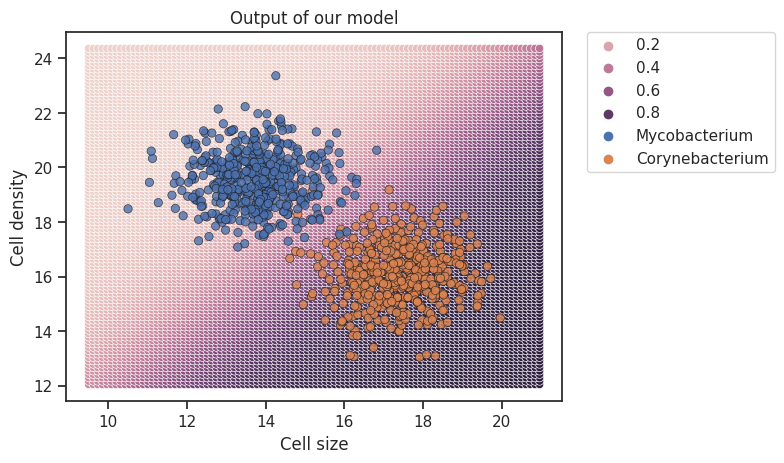

In [12]:
# Calculate and plot decision boundary of model_1
predicted_mesh = tf.squeeze(model_1.predict(points, verbose=0))
sns.scatterplot(x=points[:,0], y=points[:,1], hue=predicted_mesh)
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1],hue=y_names, alpha=0.8, edgecolor="k")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Output of our model")
plt.xlabel("Cell size")
plt.ylabel("Cell density");

**The common visualization technique for classification model decision boundaries is a contour plot.**

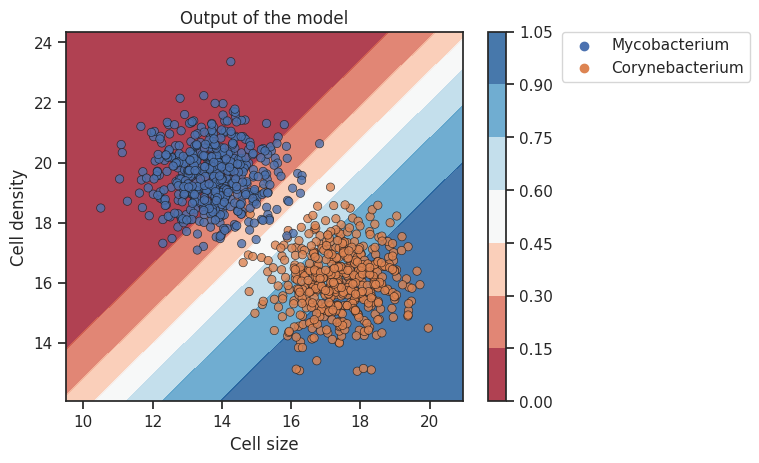

In [13]:
# Reshape the mesh_output back to the grid shape
mesh_output = tf.reshape(predicted_mesh, shape=(xx.shape))

# Plot decision boundary as contour plot
plt.contourf(xx, yy, mesh_output, cmap='RdBu', alpha=0.8)
plt.colorbar()

# Plot data points
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, alpha=0.8, edgecolor="k")
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0)
plt.title("Output of the model")
plt.xlabel("Cell size")
plt.ylabel("Cell density");

It is important to note that the per default models predict probabilities **>0.5 as 1 and <0.5 as 0**. This means that there is a zone (**Twilight zone**) in the decision boundary where the difference between different prediction outcomes is very small and highly influenced by the data (e.g., measurement error).

**In the next plot, the color scheme is adjusted to represent three ranges of values:**
- 0-0.45 : High confidence for label 0 (Mycobacterium)
- 0.45-0.55: Twilight zone
- 0.55-1.0: High confidence for label 1 (Corynebacterium)

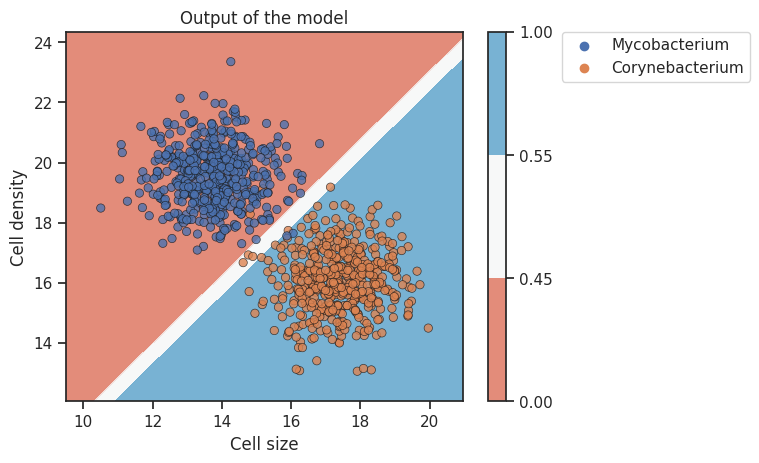

In [14]:
# Plot decision boundary as contour plot scaled to three bins
plt.contourf(xx, yy, mesh_output, cmap='RdBu', alpha=0.8, levels=[0, 0.45, 0.55, 1.0])
plt.colorbar()

# Plot data points
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, alpha=0.8, edgecolor="k")
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0)
plt.title("Output of the model")
plt.xlabel("Cell size")
plt.ylabel("Cell density");

**The trained model can be evaluated on the test data set.**

In [15]:
# Predict accuracy for test, validation and train data set
test_accuracy = model_1.evaluate(X_test, y_test, verbose=0)[1]
train_accuracy = model_1.evaluate(X_train, y_train, verbose=0)[1]
val_accuracy = model_1.evaluate(X_val, y_val, verbose=0)[1]
print(f"Test accuracy: {test_accuracy:.2f}")
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Validation accuracy: {val_accuracy:.2f}")

Test accuracy: 1.00
Train accuracy: 0.99
Validation accuracy: 0.99


**Now we find and visualize the wrong predictions and check their location on the contour plot.**

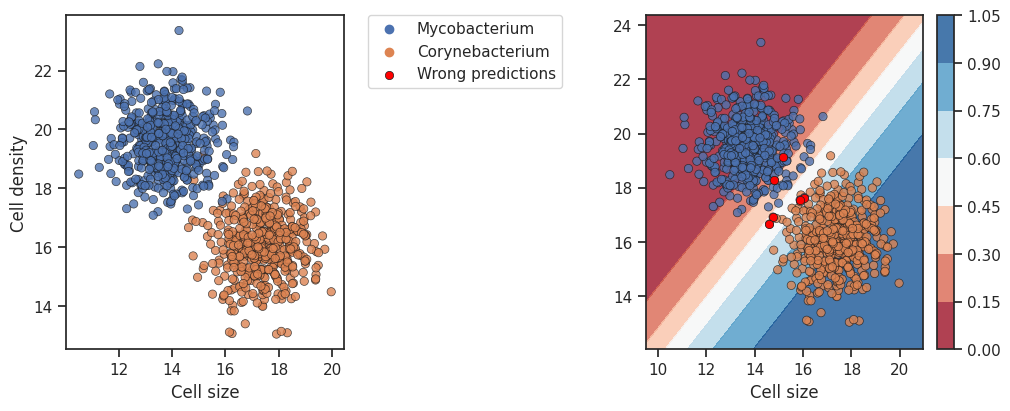

In [16]:
# Find the wrong predictions
predictions_total = tf.round(model_1.predict(X_total, verbose=0))

# Create dataframe with values, y_true and y_pred
data_predictions = {"cell_size" : X_total[:, 0],
        "cell_density" : X_total[:, 1],
        "y_true" : y_total,
        "y_pred" : tf.squeeze(predictions_total)}
predictions_df = pd.DataFrame(data_predictions)

# Filter entries where y_true is not equal to y_pred
wrong_predictions = predictions_df[predictions_df["y_true"] != predictions_df["y_pred"]]

# Visualize data set
fig, ax = plt.subplots(1,2, constrained_layout = True, figsize=(10,4))

# Plot decision boundary as contour plot
contour = ax[1].contourf(xx, yy, mesh_output, cmap='RdBu', alpha=0.8)
plt.colorbar(contour, ax=ax[1])

# Plot scatterplots
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, ax=ax[0], alpha=0.8, edgecolor="k", legend=None)
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, ax=ax[1], alpha=0.8, edgecolor="k")
sns.scatterplot(data=wrong_predictions, x="cell_size", y="cell_density", color="red", ax=ax[1], edgecolor="k", label="Wrong predictions")
ax[0].set_xlabel("Cell size")
ax[1].set_xlabel("Cell size")
ax[1].legend(bbox_to_anchor=(-1., 1), loc='upper left', borderaxespad=0)
ax[0].set_ylabel("Cell density")
ax[1].set_ylabel(None);

❓**Question:** Take a close look at the wrong predictions. What do you think was the reason for the wrong prediction?

It is very often useful to see how a model makes error. For example, are the errors equivaly distributed over the classes or is on class in particular mismatched with another class.
Since in real-world applications an ANN will never be 100% accurate it is often also important how the errors are distributed. Very useful metrices for this are:
> Precision:
> Recall:

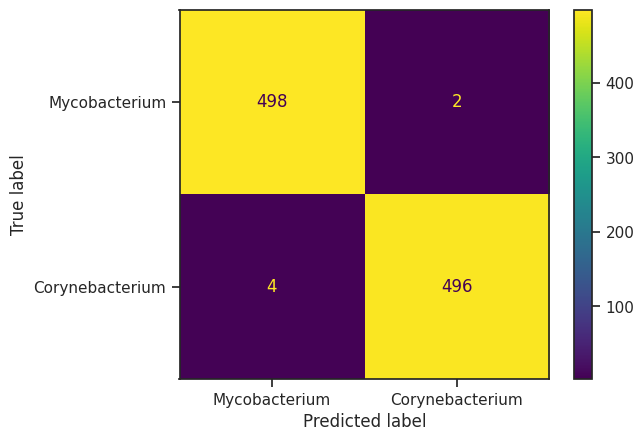

In [17]:
# Calculate and plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions_total = tf.round(model_1.predict(X_total, verbose=0))
cm = confusion_matrix(y_true=y_total, y_pred=predictions_total)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Mycobacterium", "Corynebacterium"])
disp.plot();

In [18]:
# Calculate precision and recall score
from sklearn.metrics import precision_score, recall_score
model_1_precision = precision_score(y_true=y_total, y_pred=predictions_total)
model_1_recall = recall_score(y_true=y_total, y_pred=predictions_total)
print(f"model_1 precision score: {100 * model_1_precision:.1f}%")
print(f"model_1 recall score: {100 * model_1_recall:.1f}%")

model_1 precision score: 99.6%
model_1 recall score: 99.2%


Let's assume we want to use the model in a detection method for Mycobacterium tuberculosis. Cells are sampled from patients, the cell size and cell density is automatically determined and out model should judge if the sampled cells could be a Mycobacterium tuberculosis cell.
Question: How would you design a model for this use case regarding it's precision and recall?

We can change the the threshold from 0.5 to 0.6 to ensure that the model detects all mycobacterial cells

model_1 precision score: 100.0%
model_1 recall score: 96.6%


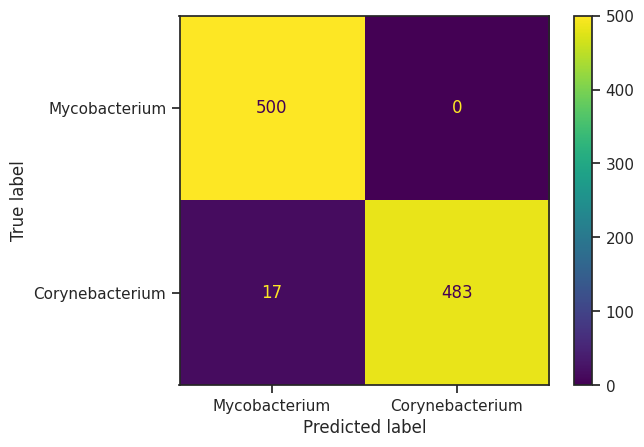

In [19]:
# Calculate precision and recall score
predictions_total_60 = model_1.predict(X_total, verbose=0) >= 0.60
predictions_total_60 = predictions_total_60.astype(int)
model_1_precision = precision_score(y_true=y_total, y_pred=predictions_total_60)
model_1_recall = recall_score(y_true=y_total, y_pred=predictions_total_60)
print(f"model_1 precision score: {100 * model_1_precision:.1f}%")
print(f"model_1 recall score: {100 * model_1_recall:.1f}%")

# Plot confusion matrix with threshold 0.45
cm2 = confusion_matrix(y_true=y_total, y_pred=predictions_total_60)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Mycobacterium", "Corynebacterium"])
disp.plot();

Exercise: More clusters

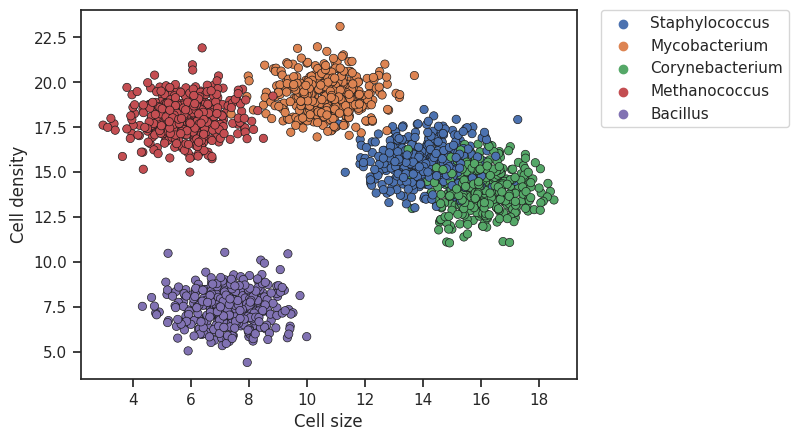

In [20]:
# Create clusters
X_total, y_total = make_blobs(n_samples=2000,
                              centers=5,
                              center_box=(5,20),
                              cluster_std=1,
                              random_state=42,
                              shuffle=True)

# Create a dictionary to map integer labels to organism names
organism_names_mapping = {
    0: "Mycobacterium",
    1: "Corynebacterium",
    2: "Bacillus",
    3: "Methanococcus",
    4: "Staphylococcus"
}

# Convert labels (0, 1, 2, 3, 4) to names
y_names = [organism_names_mapping[i] for i in y_total]

# Visualize data set
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, edgecolor="k")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Cell size")
plt.ylabel("Cell density");

In [21]:
# Split data set into train, test and validation set
X_train, X_test, y_train, y_test = train_test_split(X_total,y_total, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.875)

# Check the split and put all values in datafram
data = [[X_train.shape, len(X_train), 100 * len(X_train) / len(X_total)],
        [y_train.shape, len(y_train), 100 * len(y_train) / len(y_total)],
        [X_test.shape, len(X_test), 100 * len(X_test) / len(X_total)],
        [y_test.shape, len(y_test), 100 * len(y_test) / len(y_total)],
        [X_val.shape, len(X_val), 100 * len(X_val) / len(X_total)],
        [y_val.shape, len(y_val), 100 * len(y_val) / len(y_total)]]
index = ["X_train", "y_train","X_test", "y_test","X_val", "y_val",]
columns = ["Shape", "Elements", "Percentage"]
pd.DataFrame(data=data,
             columns=columns,
             index=index)

Shape  Elements  Percentage
X_train  (1400, 2)      1400        70.0
y_train    (1400,)      1400        70.0
X_test    (400, 2)       400        20.0
y_test      (400,)       400        20.0
X_val     (200, 2)       200        10.0
y_val       (200,)       200        10.0

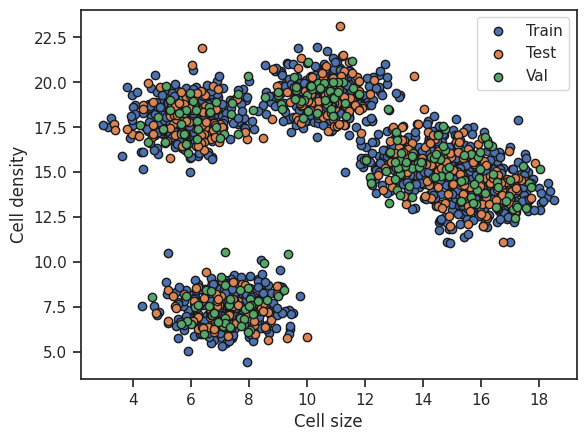

In [22]:
# Visualize data sets
plt.scatter(X_train[:,0],X_train[:,1], label="Train", edgecolor="k")
plt.scatter(X_test[:,0],X_test[:,1], label="Test", edgecolor="k")
plt.scatter(X_val[:,0],X_val[:,1], label="Val", edgecolor="k")
plt.legend()
plt.xlabel("Cell size")
plt.ylabel("Cell density");

In [23]:
# Set up random seed for reproducibility
tf.random.set_seed(42)

# Create model
model_2 = keras.Sequential([
    keras.Input(shape=(X_train.shape[1:])),
    layers.Dense(units=5,activation="softmax")])

model_2.summary()

# Compile model
model_2.compile(optimizer="sgd",
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

# Fit model
history_2 = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
44/44 [==============================] - 1s 6ms/step - loss: 2.8501 - accuracy: 0.3436 - val_loss: 1.0454 - val_accuracy: 0.4750
Epoch 2/10
44/44 [==============================] - 0s 2ms/step - loss: 0.9095 - accuracy: 0.6093 - val_loss: 0.8940 - val_accuracy: 0.7100
Epoch 3/10
44/44 [==============================] - 0s 3ms/step - loss: 0.8214 - accuracy: 0.6636 - val_loss: 0.9012 - val_accuracy: 0.5950
Epoch 4/10
44/44 [==============================] - 0s 3ms/step - loss: 0.7837 - accuracy: 0.6800 - val_loss: 0.8259 - val_accuracy: 0.6100
Epoch 5/10
44/44 [========

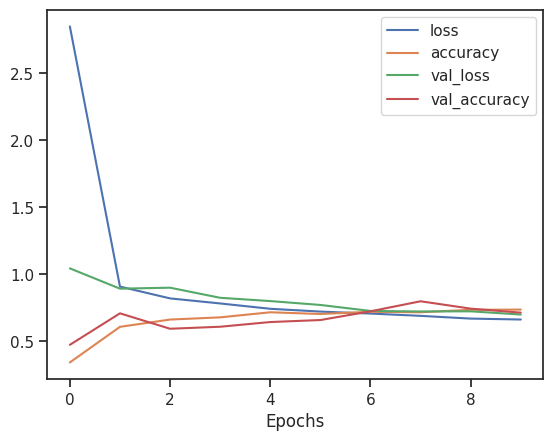

In [24]:
# Plot accuracies and losses over epochs
pd.DataFrame(history_2.history).plot()
plt.xlabel("Epochs");

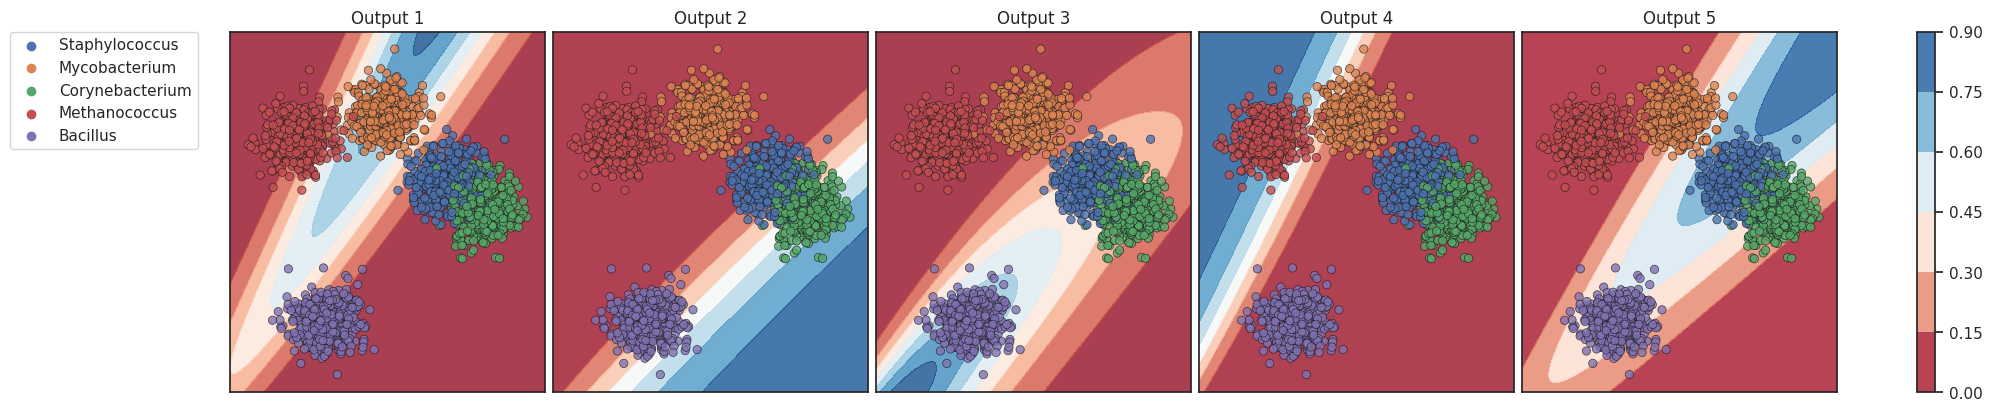

In [25]:
# Predict decision boundary

# Boundaries of plot
x_min = X_total[:, 0].min() - 1
x_max = X_total[:, 0].max() + 1
y_min = X_total[:, 1].min() - 1
y_max = X_total[:, 1].max() + 1

# Array with continous 100 points
x_array = np.linspace(x_min, x_max, 100)
y_array = np.linspace(y_min, y_max, 100)

# Combines every point from array 1 with every point of array 2
xx, yy = np.meshgrid(x_array, y_array)

# Create 2D-array with xx and yy as columns
points = np.column_stack((xx.ravel(), yy.ravel()))

# Predict output using meshgrid as input
mesh_output = model_2.predict(points, verbose=0)

# Split the output into the 5 probability channels
probability_channels = [tf.reshape(mesh_output[:, i], xx.shape) for i in range(5)]

# Output titles for plots
output_titles = ["Output 1", "Output 2", "Output 3", "Output 4", "Output 5"]

# Visualize data set
fig, axes = plt.subplots(1,5, constrained_layout = True, figsize=(20,4))

# Plot decision boundary and scatterplots
for i, ax in enumerate(axes):
    # Plot decision boundary as contour plot
    cnt = ax.contourf(xx, yy, probability_channels[i], cmap='RdBu', alpha=0.8)
    ax.set_title(output_titles[i])
    # Plot scatterplot and only display legend for first subplot
    if i == 0:
      sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, ax=ax, alpha=0.8, edgecolor="k")
      ax.legend(bbox_to_anchor=(-0.7, 1), loc='upper left', borderaxespad=0)
    else:
      sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, ax=ax, alpha=0.8, edgecolor="k", legend=None)
    # Remove axes labels and ticks
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

# Add a single colorbar for all subplots
plt.colorbar(cnt, ax=axes);

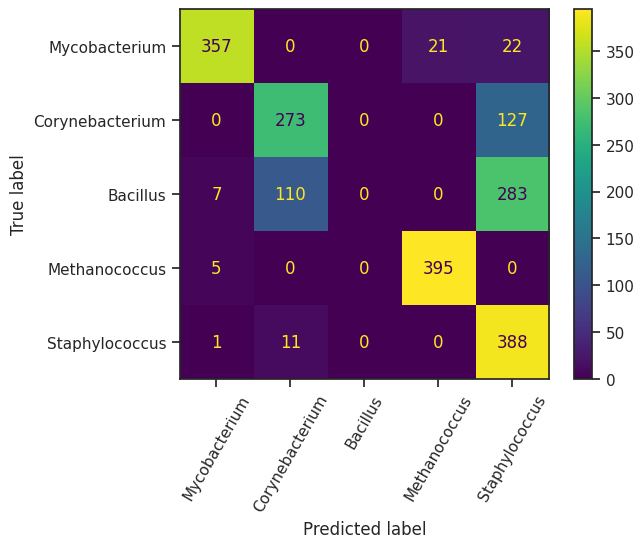

In [26]:
# Plot confusion matrix
predictions_total = model_2.predict(X_total, verbose=0)
cm = confusion_matrix(y_true=y_total, y_pred=[predictions_total[i].argmax() for i in range(len(predictions_total))])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=organism_names_mapping.values())
disp.plot(xticks_rotation=60);

Blackbox problem

In [27]:
# Extract weights and biases from model and put them in dataframe
model_2_weights_x, model_2_weights_y = model_2.get_weights()[0]
model_2_biases = model_2.get_weights()[1]
weights_biases_df = pd.DataFrame([model_2_weights_x, model_2_weights_y, model_2_biases],
                                 index=["x_weights", "y_weights", "bias_vectors"],
                                 columns=list(range(1,6))).transpose()

weights_biases_df

x_weights  y_weights  bias_vectors
1  -0.306134   0.309413     -0.126144
2   0.795371  -0.612354     -0.122742
3   0.371044  -0.278359      0.380682
4  -1.181572   0.700332      0.023034
5   0.324218  -0.093130     -0.154830

Exercise: Improve basic model

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                192       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 8,837
Trainable params: 8,837
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
44/44 [==============================] - 1s 7ms/step - loss: 1.1433 - accuracy: 0.5836 - val_loss: 0.9768 - val_accuracy: 0.7900
Epoch 2/150
44/44 [=============================

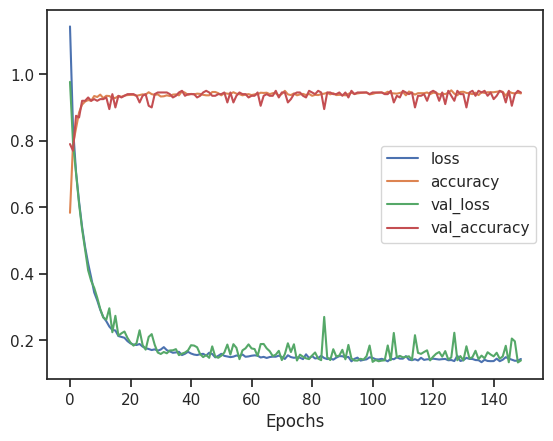

In [28]:
# Fill out the hyperparameters

# units_i is the number of neurons in layer i. Typical values are 0-100
units_1 = 64
units_2 = 64
units_3 = 64
units_output = 5
# activation_i is the activation function for layer i. You can use "relu", "tanh", "softmax"
activation_1 ="tanh"
activation_2 ="relu"
activation_3 ="tanh"
activation_output ="softmax"
# epochs
epochs = 150


# Set up random seed for reproducibility
tf.random.set_seed(42)

# Build model
model_3 = keras.Sequential([layers.Dense(units=units_1, activation=activation_1, input_shape=X_train.shape[1:]),
                            layers.Dense(units=units_2, activation=activation_2),
                            layers.Dense(units=units_3, activation=activation_3),
                            layers.Dense(units=units_output, activation=activation_output)],
                            name="Model_3")

model_3.summary()

# Compile model
model_3.compile(optimizer="sgd",
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

# Fit model
history_3 = model_3.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

# Plot accuracies and losses over epochs
pd.DataFrame(history_3.history).plot()
plt.xlabel("Epochs");

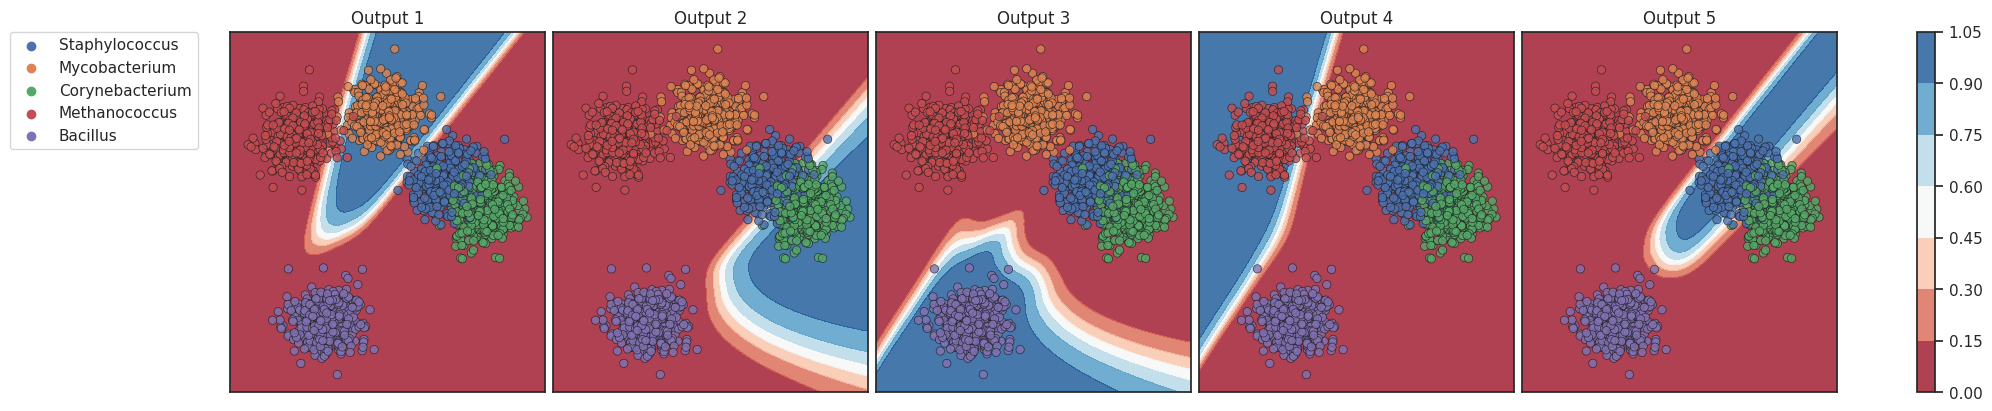

In [29]:
# Predict decision boundary

# Boundaries of plot
x_min = X_total[:, 0].min() - 1
x_max = X_total[:, 0].max() + 1
y_min = X_total[:, 1].min() - 1
y_max = X_total[:, 1].max() + 1

# Array with continous 100 points
x_array = np.linspace(x_min, x_max, 100)
y_array = np.linspace(y_min, y_max, 100)

# Combines every point from array 1 with every point of array 2
xx, yy = np.meshgrid(x_array, y_array)

# Create 2D-array with xx and yy as columns
points = np.column_stack((xx.ravel(), yy.ravel()))

# Predict output using meshgrid as input
mesh_output = model_3.predict(points, verbose=0)

# Split the output into the 5 probability channels
probability_channels = [tf.reshape(mesh_output[:, i], xx.shape) for i in range(5)]

# Output titles for plots
output_titles = ["Output 1", "Output 2", "Output 3", "Output 4", "Output 5"]

# Visualize data set
fig, axes = plt.subplots(1,5, constrained_layout = True, figsize=(20,4))

# Plot decision boundary and scatterplots
for i, ax in enumerate(axes):
    # Plot decision boundary as contour plot
    cnt = ax.contourf(xx, yy, probability_channels[i], cmap='RdBu', alpha=0.8)
    ax.set_title(output_titles[i])
    # Plot scatterplot and only display legend for first subplot
    if i == 0:
      sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, ax=ax, alpha=0.8, edgecolor="k")
      ax.legend(bbox_to_anchor=(-0.7, 1), loc='upper left', borderaxespad=0)
    else:
      sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1], hue=y_names, ax=ax, alpha=0.8, edgecolor="k", legend=None)
    # Remove axes labels and ticks
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

# Add a single colorbar for all subplots
plt.colorbar(cnt, ax=axes);

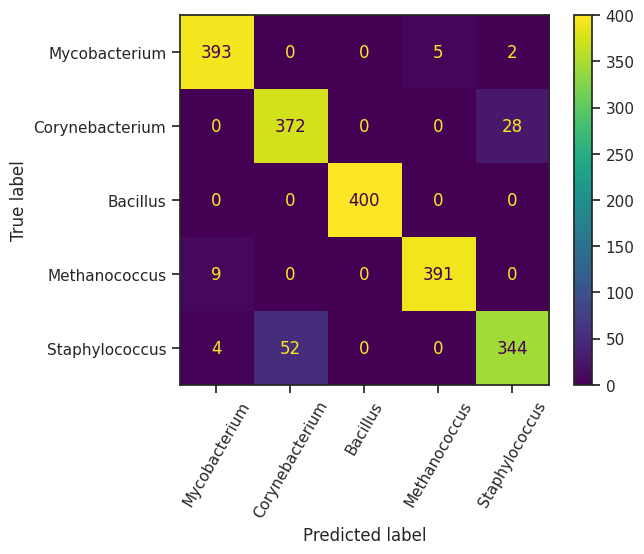

In [30]:
# Plot confusion matrix
predictions_total = model_3.predict(X_total, verbose=0)
cm = confusion_matrix(y_true=y_total, y_pred=[predictions_total[i].argmax() for i in range(len(predictions_total))])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=organism_names_mapping.values())
disp.plot(xticks_rotation=60);

When you are happy with your model, evaluate it finally on the test data set and compare it to model_2.

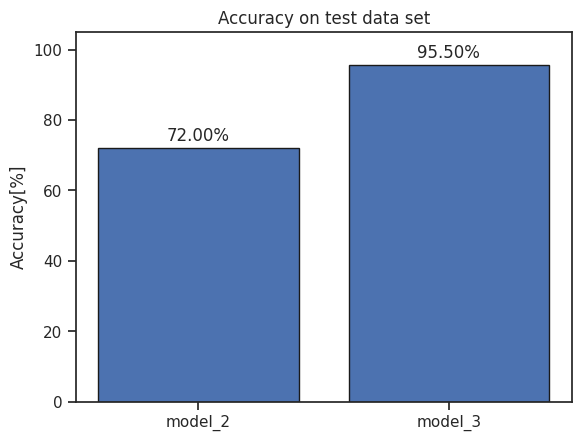

In [31]:
# Evaluate model_2 and model_3 on test data set
model_2_eval = model_2.evaluate(X_test, y_test, verbose=0)[1] * 100
model_3_eval = model_3.evaluate(X_test, y_test, verbose=0)[1] * 100
plt.bar(x=["model_2", "model_3"], height=[model_2_eval, model_3_eval], edgecolor="k")
plt.title("Accuracy on test data set")
plt.ylabel("Accuracy[%]")
plt.ylim(0,105)

# Annotate each bar with its accuracy value
for i, v in enumerate([model_2_eval, model_3_eval]):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

# Image classification with the MNIST dataset

In [32]:
from tensorflow.keras.datasets import mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [33]:
# Train data are batches of 60000 images of 28x28 format
train_data[0], train_labels[0], train_data.shape, train_labels.shape

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

Label: 5


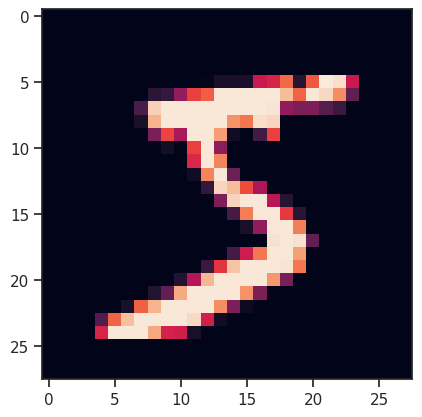

In [34]:
# Plot first image
plt.imshow(train_data[0])
print(f"Label: {train_labels[0]}")

In [35]:
# Normalize data
print(f"Minimum pixel value: {train_data[0].min()} and maximum pixel value: {train_data[0].max()}")

train_data_normalized = train_data / train_data[0].max()
test_data_normalized = test_data / train_data[0].max()

print(train_data_normalized[0])

Minimum pixel value: 0 and maximum pixel value: 255
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0. 

In [36]:
# Set random set
tf.random.set_seed(42)

# Create model without normalization
model_1 = keras.Sequential([
    layers.Flatten(input_shape=(28,28)), #Flattens every picture to a 1D-array with 28x28 = 784 values
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

model_1.summary()

# Compile model

model_1.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=keras.optimizers.Adam(),
                       metrics=["accuracy"])

# Train model

history_1 = model_1.fit(train_data, train_labels, epochs=10, batch_size=32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1955 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4029 - accuracy: 0.9042
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2899 - accuracy: 0.9258
Epoch 4/

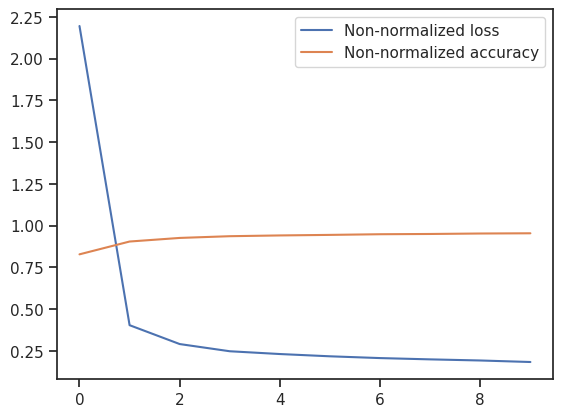

In [37]:
# Plot training of normalized and non-normalized model
plt.plot(history_1.history["loss"], label="Non-normalized loss")
plt.plot(history_1.history["accuracy"], label="Non-normalized accuracy")
#plt.plot(history_2.history["loss"], label="Normalized loss")
#plt.plot(history_2.history["accuracy"], label="Normalized accuracy")
plt.legend()

313/313 [==============================] - 1s 2ms/step - loss: 2.4124 - accuracy: 0.0974
[2.41235613822937, 0.09740000218153]


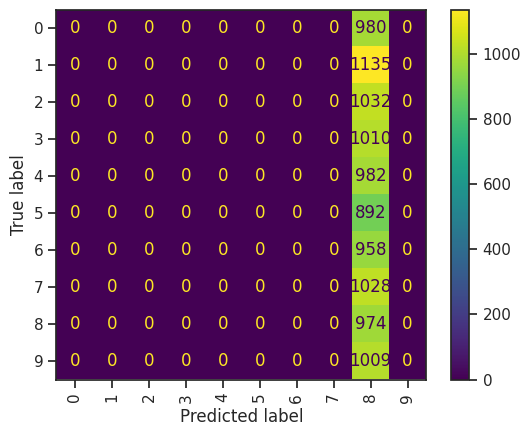

In [38]:
# Calculate and plot confusion matrix of best model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = model_1.predict(test_data_normalized)
print(model_1.evaluate(test_data_normalized, test_labels))

confusion_matrix = confusion_matrix(y_true=test_labels, y_pred=y_pred_test.argmax(axis=1)) # Converts probabilities to integers and finds position = class
disp = ConfusionMatrixDisplay(confusion_matrix)
disp.plot(xticks_rotation="vertical")